## Unit 7 | Assignment - Distinguishing Sentiments

## Background


__Twitter__ has become a wildly sprawling jungle of information&mdash;140 characters at a time. Somewhere between 350 million and 500 million tweets are estimated to be sent out _per day_. With such an explosion of data, on Twitter and elsewhere, it becomes more important than ever to tame it in some way, to concisely capture the essence of the data.

Choose __one__ of the following two assignments, in which you will do just that. Good luck!

## News Mood

In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity of various news oulets, and to present your findings visually.

Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: __BBC, CBS, CNN, Fox, and New York times__.

![output_10_0.png](output_10_0.png)

![output_13_1.png](output_13_1.png)

The first plot will be and/or feature the following:

* Be a scatter plot of sentiments of the last __100__ tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
* Each plot point will reflect the _compound_ sentiment of a tweet.
* Sort each plot point by its relative timestamp.

The second plot will be a bar plot visualizing the _overall_ sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

The tools of the trade you will need for your task as a data analyst include the following: tweepy, pandas, matplotlib, seaborn, textblob, and VADER.

Your final Jupyter notebook must:

* Pull last 100 tweets from each outlet.
* Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet. 
* Pull into a DataFrame the tweet's source acount, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
* Export the data in the DataFrame into a CSV file.
* Save PNG images for each plot.

As final considerations:

* Use the Matplotlib and Seaborn libraries.
* Include a written description of three observable trends based on the data. 
* Include proper labeling of your plots, including plot titles (with date of analysis) and axes labels.
* Include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.  



In [83]:
# Dependencies
import tweepy
import json
import numpy as np
import requests as req
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
from datetime import datetime
from scipy import stats

from matplotlib.font_manager import FontProperties

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "HznpSY7QIAZ0EEtgCqUdd7BNG"
consumer_secret = "Avtpeem8WwjI00cqxRULxOMDNw5ObgsNxDJeta6KFaboSjJasl"
access_token = "971785066874580993-NfRif6uDrFp8AubFP5LPolFifn8ftIb"
access_token_secret = "cBWzmchL8BdYHJu9iizq7BGM13Ew7csRK1XdWyCMNKys3"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())



In [111]:
# Target User Accounts
target_user = ("@BBCNews", "@CBSNews", "@CNN","@FoxNews","@nytimes")

# Array of Eligible Tweets
tweet_array = []

# Array to hold sentiment
sentiment_array = []

# Create variable for holding the oldest tweet
oldest_tweet = ""
count = 0

# Variables for holding sentiments
news_agency = []
tweet_text = []
tweet_times = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
counter = []
color = []

# Loop through all target users
for target in target_user:

    # Loop through 5 times (total of 100 tweets)
    for x in range(1):
        #print(target)
        # Run search around each tweet
        public_tweets = api.search(target, count=100, result_type="recent",max_id=oldest_tweet)

        #print(public_tweets)

        # Loop through all tweets
        for tweet in public_tweets["statuses"]:

            # Run Vader Analysis on each tweet
            #Pull into a DataFrame the tweet's source acount, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]

            #print(compound)
            count += 1

            # Add each value to the appropriate array
            #print("before append")
            #print(target)
            news_agency.append(target)
            tweet_text.append(tweet["text"])
            tweet_times.append(tweet["created_at"])
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            counter.append(count)
            #print(counter)

            #Add color
            #print(target)
            if target == "@BBCNews":
                color.append("lightskyblue")
            elif target == "@CBSNews":
                color.append("green")
            elif target == "@CNN":
                color.append("red")
            elif target == "@FoxNews":
                color.append("blue")
            elif target == "@nytimes":
                color.append("yellow")
            #print(color)

# Store the Average Sentiments
#print(len(news_agency))
#print(len(tweet_text))
#print(len(tweet_times))
#print(len(compound_list))
#print(len(positive_list))
#print(len(negative_list))
#print(len(neutral_list))
#print(len(counter))
#print(len(color))

sentiment = {"NewsAgency": news_agency,
             "Tweet_Text": tweet_text,
             "Tweet_Date": tweet_times,
             "Compound": compound_list,
             "Positive": positive_list,
             "Neutral": negative_list,
             "Negative": neutral_list,
             "Tweet Count": len(compound_list),
             "count":counter,
             "color":color
            }

sentiment_df = pd.DataFrame(sentiment)
sentiment_df.to_csv("Sentiment_Analysis_Data")

In [3]:
# Convert all tweet times into datetime objects
tweet_time_objects = []

# Add each datetime object into the array
for x in range(len(tweet_times)):
    tweet_datetime = datetime.strptime(tweet_times[x], "%a %b %d %H:%M:%S %z %Y")
    tweet_time_objects.append(tweet_datetime)
    #print(tweet_datetime)

    # Preview that datetimes are matching
    if x % 100 == 0:
        print(tweet_times[x])
        print(tweet_datetime)

# Calculate the time between tweets
time_in_between = []

# Calculate the time in between each tweet
for x in range(len(tweet_time_objects)-1):
    hrs_apart = ((tweet_time_objects[x] - tweet_time_objects[x+1]).seconds) / 3600  #calculates hours
    time_in_between.append(hrs_apart)

    

Sat Mar 24 01:27:35 +0000 2018
2018-03-24 01:27:35+00:00
Sat Mar 24 01:27:28 +0000 2018
2018-03-24 01:27:28+00:00
Sat Mar 24 01:28:10 +0000 2018
2018-03-24 01:28:10+00:00
Sat Mar 24 01:28:10 +0000 2018
2018-03-24 01:28:10+00:00
Sat Mar 24 01:28:11 +0000 2018
2018-03-24 01:28:11+00:00


In [102]:
#Be a scatter plot of sentiments of the last 100 tweets sent out by each news organization, 
#ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, 
#-1 the most negative sentiment possible, and +1 the most positive sentiment possible
#print(len(str(count)))

#print(sentiment_df["count"])
#print(sentiment_df["Compound"])

#print(time_in_between)
#print(sentiment_df.head())
#print(sentiment_df.loc[sentiment_df["NewsAgency"]=="@BBCNews"])

#target_user = ("@BBCNews", "@CBSNews", "@CNN","@FoxNews","@nytimes")
#for target in target_user:
    
sentiment_bbc_df = pd.DataFrame(sentiment_df.loc[sentiment_df["NewsAgency"]=="@BBCNews"])
sentiment_cbs_df = pd.DataFrame(sentiment_df.loc[sentiment_df["NewsAgency"]=="@CBSNews"])
sentiment_cnn_df = pd.DataFrame(sentiment_df.loc[sentiment_df["NewsAgency"]=="@CNN"])
sentiment_fox_df = pd.DataFrame(sentiment_df.loc[sentiment_df["NewsAgency"]=="@FoxNews"])
sentiment_nyt_df = pd.DataFrame(sentiment_df.loc[sentiment_df["NewsAgency"]=="@nytimes"])

#print(sentiment_cbs_df.head())

sentiment_cbs_df = sentiment_cbs_df.reset_index()
#sentiment_cbs_df.columns[0] = 'New_ID'
sentiment_cbs_df['New_ID'] = sentiment_cbs_df.index - 100

sentiment_cnn_df = sentiment_cnn_df.reset_index()
#sentiment_cnn_df.columns[0] = 'New_ID'
sentiment_cnn_df['New_ID'] = sentiment_cnn_df.index - 200

sentiment_fox_df = sentiment_fox_df.reset_index()
#sentiment_fox_df.columns[0] = 'New_ID'
sentiment_fox_df['New_ID'] = sentiment_fox_df.index - 300

sentiment_nyt_df = sentiment_nyt_df.reset_index()
#sentiment_nyt_df.columns[0] = 'New_ID'
sentiment_nyt_df['New_ID'] = sentiment_nyt_df.index - 400


#print(sentiment_bbc_df.head())
#print(sentiment_cbs_df.head())
#print(sentiment_cnn_df.head())
#print(sentiment_fox_df.head())
#print(sentiment_nyt_df.head())



In [103]:
#print(sentiment_cbs_df.head())
#print(len(sentiment_bbc_df["Compound"]))
#print (len(time_in_between)+ 1)
print(range(len(sentiment_cbs_df['Tweet_Date'])))

###### BBC
# Convert all tweet times into datetime objects
tweet_time_objects_bbc = []

# Add each datetime object into the array
for x in range(len(sentiment_bbc_df['Tweet_Date'])):
    tweet_datetime = datetime.strptime(sentiment_bbc_df['Tweet_Date'][x], "%a %b %d %H:%M:%S %z %Y")
    tweet_time_objects_bbc.append(tweet_datetime)
    #print(tweet_datetime)

    # Preview that datetimes are matching
    if x % 100 == 0:
        print(sentiment_bbc_df['Tweet_Date'][x])
        #print(tweet_times[x])
        #print(tweet_datetime)

# Calculate the time between tweets
time_in_between_bbc = []

# Calculate the time in between each tweet
for x in range(len(tweet_time_objects_bbc)-1):
    hrs_apart = ((tweet_time_objects_bbc[x] - tweet_time_objects_bbc[x+1]).seconds) / 3600  #calculates hours
    time_in_between_bbc.append(hrs_apart)



range(0, 100)
Sat Mar 24 01:27:35 +0000 2018


In [104]:

###### BBC
# Convert all tweet times into datetime objects
tweet_time_objects_bbc = []

# Add each datetime object into the array
print( sentiment_bbc_df['Tweet_Date'][x])
for x in range(len(sentiment_bbc_df['Tweet_Date'])):
    tweet_datetime = datetime.strptime(sentiment_bbc_df['Tweet_Date'][x], "%a %b %d %H:%M:%S %z %Y")
    #converted_time = datetime.strptime(raw_time, "%a %b %d %H:%M:%S %z %Y")

    tweet_time_objects_bbc.append(tweet_datetime)
    #print(tweet_datetime)

    # Preview that datetimes are matching
    if x % 100 == 0:
        print(sentiment_bbc_df['Tweet_Date'][x])
        #print(tweet_times[x])
        #print(tweet_datetime)

# Calculate the time between tweets
time_in_between_bbc = []

# Calculate the time in between each tweet
for x in range(len(tweet_time_objects_bbc)-1):
    hrs_apart = ((tweet_time_objects_bbc[x] - tweet_time_objects_bbc[x+1]).seconds) / 3600  #calculates hours
    time_in_between_bbc.append(hrs_apart)

#print(time_in_between_bbc)

Sat Mar 24 01:08:59 +0000 2018
Sat Mar 24 01:27:35 +0000 2018


In [105]:
#print(len(sentiment_cbs_df['Tweet_Date']))
#print(sentiment_cbs_df["Tweet_Date"])


###### CBS
# Convert all tweet times into datetime objects
tweet_time_objects_cbs = []

# Add each datetime object into the array
#print( sentiment_cbs_df['Tweet_Date'][x])

for x in range(len(sentiment_cbs_df['Tweet_Date'])):
    tweet_datetime = datetime.strptime(sentiment_cbs_df['Tweet_Date'][x], "%a %b %d %H:%M:%S %z %Y")
    #print(tweet_datetime)
    tweet_time_objects_cbs.append(tweet_datetime)
    #print(tweet_time_objects_cbs)
    
    # Preview that datetimes are matching
    if x % 100 == 0:
        print(sentiment_cbs_df['Tweet_Date'][x])

    x += 1

# Calculate the time between tweets
time_in_between_cbs = []

# Calculate the time in between each tweet
print(range(len(tweet_time_objects_cbs)-1))

for x in range(len(tweet_time_objects_cbs)-1):
    #print("in for loop")
    hrs_apart = ((tweet_time_objects_cbs[x] - tweet_time_objects_cbs[x+1]).seconds) / 3600  #calculates hours
    time_in_between_cbs.append(hrs_apart)

#time_in_between_cbs

Sat Mar 24 01:27:28 +0000 2018
range(0, 99)


In [61]:
######CNN
# Convert all tweet times into datetime objects
tweet_time_objects_cnn = []

# Add each datetime object into the array
#for x in range(len(sentiment_cnn_df['Tweet_Date'])):
#    tweet_datetime = datetime.strptime(sentiment_cnn_df['Tweet_Date'][x], "%a %b %d %H:%M:%S %z %Y")
#    tweet_time_objects_cnn.append(tweet_datetime)
    

# Add each datetime object into the array
for x in range(len(sentiment_cnn_df['Tweet_Date'])):
    tweet_datetime_cnn = datetime.strptime(sentiment_cnn_df['Tweet_Date'][x], "%a %b %d %H:%M:%S %z %Y")
    tweet_time_objects_cnn.append(tweet_datetime_cnn)
    #print(tweet_datetime)

    # Preview that datetimes are matching
    if x % 100 == 0:
        print(sentiment_cnn_df['Tweet_Date'][x])
        #print(tweet_times[x])
        #print(tweet_datetime)

# Calculate the time between tweets
time_in_between_cnn = []

# Calculate the time in between each tweet
for x in range(len(tweet_time_objects_cnn)-1):
    hrs_apart_cnn = ((tweet_time_objects_cnn[x] - tweet_time_objects_cnn[x+1]).seconds) / 3600  #calculates hours
    time_in_between_cnn.append(hrs_apart_cnn)

#######  



Sat Mar 24 01:28:10 +0000 2018


In [106]:
sentiment_fox_df = sentiment_fox_df.reset_index()
#sentiment_fox_df.columns[0] = 'New_ID'
sentiment_fox_df['New_ID'] = sentiment_fox_df.index - 300

print(sentiment_fox_df)
######FOX
# Convert all tweet times into datetime objects
tweet_time_objects_fox = []

# Add each datetime object into the array
for x in range(len(sentiment_fox_df['Tweet_Date'])):
    tweet_datetime = datetime.strptime(sentiment_fox_df['Tweet_Date'][x], "%a %b %d %H:%M:%S %z %Y")
    tweet_time_objects_fox.append(tweet_datetime)
    

    # Preview that datetimes are matching
    if x % 100 == 0:
        print(sentiment_fox_df['Tweet_Date'][x])
        #print(tweet_times[x])
        #print(tweet_datetime)

# Calculate the time between tweets
time_in_between_fox = []

# Calculate the time in between each tweet
for x in range(len(tweet_time_objects_fox)-1):
    hrs_apart = ((tweet_time_objects_fox[x] - tweet_time_objects_fox[x+1]).seconds) / 3600  #calculates hours
    time_in_between_fox.append(hrs_apart)

#######    

    


    level_0  index  Compound  Negative  Neutral NewsAgency  Positive  \
0         0    300   -0.7184     0.708    0.292   @FoxNews     0.000   
1         1    301    0.0000     1.000    0.000   @FoxNews     0.000   
2         2    302   -0.8074     0.700    0.300   @FoxNews     0.000   
3         3    303   -0.4648     0.862    0.138   @FoxNews     0.000   
4         4    304    0.4767     0.367    0.174   @FoxNews     0.459   
5         5    305   -0.8225     0.699    0.301   @FoxNews     0.000   
6         6    306    0.0000     1.000    0.000   @FoxNews     0.000   
7         7    307    0.3612     0.894    0.000   @FoxNews     0.106   
8         8    308    0.4939     0.882    0.000   @FoxNews     0.118   
9         9    309   -0.3400     0.882    0.118   @FoxNews     0.000   
10       10    310    0.4215     0.872    0.000   @FoxNews     0.128   
11       11    311   -0.6360     0.698    0.302   @FoxNews     0.000   
12       12    312    0.0000     1.000    0.000   @FoxNews     0

In [69]:
sentiment_nyt_df = sentiment_nyt_df.reset_index()
#sentiment_nyt_df.columns[0] = 'New_ID'
sentiment_nyt_df['New_ID'] = sentiment_nyt_df.index - 400

print(sentiment_nyt_df)

###### NYT
# Convert all tweet times into datetime objects
tweet_time_objects_nyt = []

# Add each datetime object into the array
for z in range(len(sentiment_nyt_df['Tweet_Date'])):
    tweet_datetime = datetime.strptime(sentiment_nyt_df['Tweet_Date'][z], "%a %b %d %H:%M:%S %z %Y")
    tweet_time_objects_nyt.append(tweet_datetime)
    

    # Preview that datetimes are matching
    if x % 100 == 0:
        print(sentiment_nyt_df['Tweet_Date'][x])
        #print(tweet_times[x])
        #print(tweet_datetime)

# Calculate the time between tweets
time_in_between_nyt = []

# Calculate the time in between each tweet
for x in range(len(tweet_time_objects_nyt)-1):
    hrs_apart = ((tweet_time_objects_nyt[x] - tweet_time_objects_nyt[x+1]).seconds) / 3600  #calculates hours
    time_in_between_nyt.append(hrs_apart)

#######    



    level_0  index  Compound  Negative  Neutral NewsAgency  Positive  \
0         0    400    0.4404     0.838    0.000   @nytimes     0.162   
1         1    401    0.0000     1.000    0.000   @nytimes     0.000   
2         2    402    0.0000     1.000    0.000   @nytimes     0.000   
3         3    403    0.0000     1.000    0.000   @nytimes     0.000   
4         4    404    0.0000     1.000    0.000   @nytimes     0.000   
5         5    405    0.4019     0.881    0.000   @nytimes     0.119   
6         6    406    0.0000     1.000    0.000   @nytimes     0.000   
7         7    407   -0.5106     0.830    0.170   @nytimes     0.000   
8         8    408   -0.0772     0.812    0.081   @nytimes     0.107   
9         9    409    0.0000     1.000    0.000   @nytimes     0.000   
10       10    410    0.3182     0.836    0.058   @nytimes     0.105   
11       11    411    0.6705     0.686    0.000   @nytimes     0.314   
12       12    412    0.0000     1.000    0.000   @nytimes     0

In [75]:
#print(len(time_in_between_bbc))
#print(len(time_in_between_cbs))
#print(len(time_in_between_cnn))
#print(len(time_in_between_fox))
#print(len(time_in_between_nyt))


99
99
99
99
99


In [77]:
#print(sentiment_bbc_df["color"])
#print(sentiment_cbs_df["color"])
#print(sentiment_cnn_df["color"])
#print(sentiment_fox_df["color"])
#print(sentiment_nyt_df["color"])

0     lightskyblue
1     lightskyblue
2     lightskyblue
3     lightskyblue
4     lightskyblue
5     lightskyblue
6     lightskyblue
7     lightskyblue
8     lightskyblue
9     lightskyblue
10    lightskyblue
11    lightskyblue
12    lightskyblue
13    lightskyblue
14    lightskyblue
15    lightskyblue
16    lightskyblue
17    lightskyblue
18    lightskyblue
19    lightskyblue
20    lightskyblue
21    lightskyblue
22    lightskyblue
23    lightskyblue
24    lightskyblue
25    lightskyblue
26    lightskyblue
27    lightskyblue
28    lightskyblue
29    lightskyblue
          ...     
70    lightskyblue
71    lightskyblue
72    lightskyblue
73    lightskyblue
74    lightskyblue
75    lightskyblue
76    lightskyblue
77    lightskyblue
78    lightskyblue
79    lightskyblue
80    lightskyblue
81    lightskyblue
82    lightskyblue
83    lightskyblue
84    lightskyblue
85    lightskyblue
86    lightskyblue
87    lightskyblue
88    lightskyblue
89    lightskyblue
90    lightskyblue
91    lights

C:\Users\elise\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


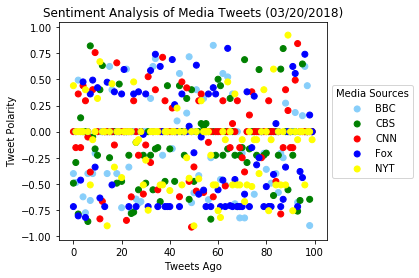

In [109]:
plt.scatter(range(len(time_in_between_bbc)+1),sentiment_bbc_df["Compound"],c=sentiment_bbc_df["color"],label='BBC')
plt.scatter(range(len(time_in_between_cbs)+1),sentiment_cbs_df["Compound"],c=sentiment_cbs_df["color"],label = "CBS")
plt.scatter(range(len(time_in_between_cnn)+1),sentiment_cnn_df["Compound"],c=sentiment_cnn_df["color"],label = "CNN")
plt.scatter(range(len(time_in_between_fox)+1),sentiment_fox_df["Compound"],c=sentiment_fox_df["color"], label= 'Fox')
plt.scatter(range(len(time_in_between_nyt)+1),sentiment_nyt_df["Compound"],c=sentiment_nyt_df["color"], label = 'NYT')

plt.title("Sentiment Analysis of Media Tweets (03/20/2018)")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.legend()


#x = np.arange(10)

#fig = plt.figure()
ax = plt.subplot(111)

#for i in xrange(5):
#    ax.plot(x, i * x, label='$y = %ix$'%i)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(title = "Media Sources", loc='center left', bbox_to_anchor=(1, 0.5))


plt.show()
plt.savefig("NewsMoodScatter.jpg")

-0.09802999999999995
-0.102604
-0.02952600000000002
-0.15074300000000007
-0.126502
[-0.09802999999999995, -0.102604, -0.02952600000000002, -0.15074300000000007, -0.126502]


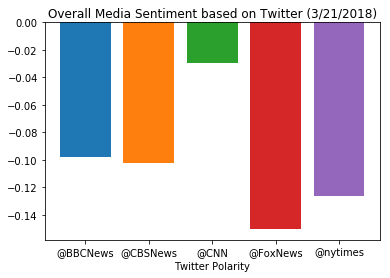

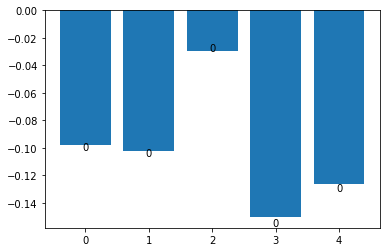

In [110]:
print(np.mean(sentiment_bbc_df["Compound"]))
print(np.mean(sentiment_cbs_df["Compound"]))
print(np.mean(sentiment_cnn_df["Compound"]))
print(np.mean(sentiment_fox_df["Compound"]))
print(np.mean(sentiment_nyt_df["Compound"]))

mean_list = []

mean_list.append(np.mean(sentiment_bbc_df["Compound"]))
mean_list.append(np.mean(sentiment_cbs_df["Compound"]))
mean_list.append(np.mean(sentiment_cnn_df["Compound"]))
mean_list.append(np.mean(sentiment_fox_df["Compound"]))
mean_list.append(np.mean(sentiment_nyt_df["Compound"]))

print(mean_list)

rects1 = plt.bar(sentiment_bbc_df["NewsAgency"], np.mean(sentiment_bbc_df["Compound"]))
plt.bar(sentiment_cbs_df["NewsAgency"], np.mean(sentiment_cbs_df["Compound"]))
plt.bar(sentiment_cnn_df["NewsAgency"], np.mean(sentiment_cnn_df["Compound"]))
plt.bar(sentiment_fox_df["NewsAgency"], np.mean(sentiment_fox_df["Compound"]))
plt.bar(sentiment_nyt_df["NewsAgency"], np.mean(sentiment_nyt_df["Compound"]))

plt.title("Overall Media Sentiment based on Twitter (3/21/2018)")
plt.xlabel("Twitter Polarity")

N=5
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, mean_list)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)

plt.show()

plt.savefig("NewsMood_Bar")


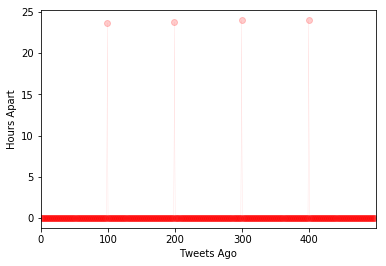

In [92]:
# Plot Time Between Tweets
#plt.plot(range(len(time_in_between)), time_in_between, marker="o", 
#               linewidth=0.25, alpha=0.2, color="r")
#plt.xlim([0, len(time_in_between)])
#plt.ylabel("Hours Apart")
#plt.xlabel("Tweets Ago")
#plt.title("Tweet Velocity: %s" % target_user)
#plt.show()